In [1]:
import pandas as pd
import json
import sys
import os
import gensim
import numpy as np
import glob
from sklearn.cluster import KMeans
from gensim.models.doc2vec import Doc2Vec

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df_all = pd.DataFrame(columns=[ 'content', 'date_', 'infor', 'source', 'tag','title', 'type', ])
for files in glob.glob('E:/news_project/news_beforeETL/printed_news/printed_news_1040'):
    with open(files,"r", encoding="utf-8") as json_data:
        data = json.load(json_data)
        df = pd.DataFrame.from_dict(data, orient='columns')
        df_all=pd.concat([df_all,df],axis=0,ignore_index=True )
print(df_all.head())

                                             content                 date_  \
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...           2018-06-30    
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...           2018-06-30    
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...           2018-06-30    
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  2018-06-30 13:09:41    
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  2018-06-30 12:45:41    

                                             infor source  tag  \
0                            2018-06-30 /中央社 /國內政治   中央社   NaN   
1                            2018-06-30 /中央社 /國內政治   中央社   NaN   
2                            2018-06-30 /中央社 /國內政治   中央社   NaN   
3  2018-06-30 13:09:41 /中央社 /國內政治 /中央社記者蕭博陽南投縣30日電   中央社   NaN   
4   2018-06-30 12:45:41 /中央社 /國內政治 /中央社記者王淑芬高雄30日電   中央社   NaN   

                title     type  
0   馬英九出席國會青年體驗營（1）\n  printed  
1      丁守中與吳伯雄同台（2）\n  printed  
2      丁守中與吳伯雄同台（1）\n  printed  
3 

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
df=df_all
#df = df.drop(["author"], axis=1)
df = df.drop(["date_"], axis=1)
df = df.drop(["infor"], axis=1)
df = df.drop(["tag"], axis=1)
df = df.drop(["source"], axis=1)
df = df.drop(["type"], axis=1)
#df = df.drop(["url"], axis=1)
print(df.head())

                                             content               title
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...   馬英九出席國會青年體驗營（1）\n
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...      丁守中與吳伯雄同台（2）\n
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...      丁守中與吳伯雄同台（1）\n
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  墓仔埔變公園 總統肯定洪國浩施政\n
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  陳菊：為陳其邁輔選是應該也是責任\n


In [4]:
print(df.head())

                                             content               title
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...   馬英九出席國會青年體驗營（1）\n
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...      丁守中與吳伯雄同台（2）\n
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...      丁守中與吳伯雄同台（1）\n
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  墓仔埔變公園 總統肯定洪國浩施政\n
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  陳菊：為陳其邁輔選是應該也是責任\n


In [5]:
def split_news(news):
    return " ".join(jieba.cut(news))

def process_news(df):
    df['content'] = df ['content'].apply(split_news)
    df['title'] = df['title'].str.replace('\r','')
    df['title'] = df['title'].str.replace('\n','')
    return df

In [6]:
import jieba
df = process_news(df)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BIGDAT~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.743 seconds.
Prefix dict has been built succesfully.


In [7]:
df.head()

,content,title
0,前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...,馬英九出席國會青年體驗營（1）
1,國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...,丁守中與吳伯雄同台（2）
2,國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...,丁守中與吳伯雄同台（1）
3,（ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...,墓仔埔變公園 總統肯定洪國浩施政
4,（ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...,陳菊：為陳其邁輔選是應該也是責任


In [8]:
#取出content列為一個list
b=list(df['content'])

In [9]:
### 取所有'content'欄位的值
# df.loc[:,['content']]

### 取第0個值_行，在第0個欄位('content')_欄
# t=df.iloc[0,0]
# print(type(t))

### 文檔放到list中
# data = []
# for d in range(0,300):
#     t=df.iloc[d,0]
#     data.append(t)

In [10]:
TaggededDocument=gensim.models.doc2vec.TaggedDocument

In [11]:
x_train=[]
for i, text in enumerate(b):
    word_list = text.split(' ')
    l = len(word_list)
    word_list[l-1]=word_list[l-1].strip()
    document=TaggededDocument(word_list,tags=[i])
    x_train.append(document)
#print(x_train)
c = x_train

*sentences：可以是一个list，对于大语料集，建议使用BrownCorpus,Text8Corpus或lineSentence构建。
*size：是指特征向量的维度，默认为100。
*alpha: 是初始的学习速率，在训练过程中会线性地递减到min_alpha。
*window：窗口大小，表示当前词与预测词在一个句子中的最大距离是多少。
*min_count:可以对字典做截断. 词频少于min_count次数的单词会被丢弃掉, 默认值为5。
*max_vocab_size: 设置词向量构建期间的RAM限制，设置成None则没有限制。
*sample: 高频词汇的随机降采样的配置阈值，默认为1e-3，范围是(0,1e-5)。
*seed：用于随机数发生器。与初始化词向量有关。
*workers：用于控制训练的并行数。
*min_alpha：学习率的最小值。
*sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
*hs: 如果为1则会采用hierarchica·softmax技巧。如果设置为0（默认），则使用negative sampling。
*negative: 如果>0,则会采用negativesampling，用于设置多少个noise words（一般是5-20）。
*cbow_mean: 如果为0，则采用上下文词向量的和，如果为1（default）则采用均值，只有使用CBOW的时候才起作用。
*hashfxn： hash函数来初始化权重，默认使用python的hash函数。
*iter： 迭代次数，默认为5。
*trim_rule： 用于设置词汇表的整理规则，指定那些单词要留下，哪些要被删除。可以设置为None（min_count会被使用）。
*sorted_vocab： 如果为1（默认），则在分配word index 的时候会先对单词基于频率降序排序。
*batch_words：每一批的传递给线程的单词的数量，默认为10000。

In [12]:
model=Doc2Vec(x_train, min_count=1, window=3, vector_size=300, negative=5,workers=4)
model.train(x_train,total_examples=model.corpus_count,epochs=10)

In [13]:
model_dm=model

In [45]:
#預測新句子的向量Paragraph vector了,這裡用gensim裡infer_vector(),
#預測新的句子，這裡根據經驗，alpha（學習步長）設置小一些，
#迭代次數設置大一些。找到訓練樣本中與這個句子最相近的10個句子。
#可以看到訓練出來的結果與測試的新句子是有關聯的。
strl=df.iloc[111,0]
test_text=strl.split(' ')
#得到向量array命名為inferred_vector
inferred_vector=model_dm.infer_vector(doc_words=test_text,alpha=0.025,steps=500)

sims=model_dm.docvecs.most_similar([inferred_vector],topn=3)
sims

[(111, 0.3222552537918091),
 (282, 0.32207155227661133),
 (204, 0.30986452102661133)]

In [46]:
#找到與特定文章strl相似的文章

for count, sim in sims:
    print(count,sim)
    sentence = c[count]
    words = ''
    
    for word in sentence[0]:
        words = words + word +' '
    print(words,sim,len(sentence[0]))
    

111 0.3222552537918091
【 記者 蕭文彥 台北 報導 】 立法院 日前 初審 公司法 ， 經濟部 參考 立委 提案 內容且 新增 但書 被 稱 是 為 SOGO 案 量身 訂 做 的 帝王 條款 ， 且 未知 會 提案 立委 。 立法院 長 蘇嘉全 28 日 說 ， 這種 行為 不 尊重 立委 、 不妥 、 不護 短 。 蘇嘉全 28 日 上午 召集 朝野 黨團 協商 公司法 部分 條文 修正 草案 ， 對 於 初 審時 ， 朝野 立委 希望 在 公司法 第 9 條 修正 內容 ， 將 公司 登記 「 虛偽 不實 」 的 涵蓋 範圍 ， 明確 納入 刑法 偽造 文書 印文 罪章 規定 。 但 經濟部 加入 一項 但 書 ， 「 若 撤銷 或 廢止 有 重大 損害 股東 權益 或 公司 債權 人 利益 之虞者 ， 不在此限 」 ， 此舉 引發 朝野 立委 同聲 批評 。 上午 朝野 協商時 ， 國民黨 立委 廖國棟 、 孔文吉 接棒 發 言表 達不滿 ， 時代 力量 立委 黃 國昌 也 說 ， 經濟 部後來 提出 的 乙案 ， 加 了 但 書 ， 就是 所謂 的 「 帝王 條款 」 ， 提出 的 這個 版本 是 借用 委員之名 ， 是 賦予 經濟部 的 帝王 條款 ， 質疑 為 SOGO 案 量身 打造 。 經濟 部次長 王美花 解釋 ， 當時 誤解 ， 但 條文 說 明欄 清楚 表示 ， 除 參考 立委 意見 外 也 加入 但書 。 不過 ， 蘇嘉全 說 ， 現在 不是 談內容 ， 立委 授權 經濟部 整理 修正 內容 ， 經濟部 要 告知 立委 ， 這是 整理 後 的 修正 內容 ， 且 新增 的 但 書 規定 ， 「 你們 同 不 同意 」 ， 不是 內容 問題 而是 立法 程序 上 ， 這樣 不妥 ； 他個 人覺 得 這是 對 立委 的 不 尊重 。 蘇嘉全 拿出 版本 說 ， 文中 雖有 說明 參考 立委 高志 鵬 ， 但 高志 鵬 都 不 知道 ， 且後面 還加 但 書 ， 「 參考 我 的 就 照 我 的 ， 怎麼後面 還加 了 一堆 」 ； 柯建銘 回 說 「 那 就 不用 寫 參考 ， 照 高志 鵬委員 的 版本 就 好 」 ； 蘇嘉全 說 「 為 何不 寫 參考 廖國棟 委員 ， 人家 被 參考 立委 都 不爽 」 ， 兩人 

In [16]:
#跑很久喔!請小心
#所有的文章都得到固定長度的vec
df['d2v_Vec']='0'
for i in range(0,300):
    strl=df.iloc[i,0]
    test_text=strl.split(' ')
    #得到向量array命名為inferred_vector
    inferred_vector=model_dm.infer_vector(doc_words=test_text,alpha=0.025,steps=500)
    
    df.loc[i,'d2v_Vec']=list(inferred_vector)
    
print(df.head())    

                                             content             title  \
0  前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...   馬英九出席國會青年體驗營（1）   
1  國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...      丁守中與吳伯雄同台（2）   
2  國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...      丁守中與吳伯雄同台（1）   
3  （ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...  墓仔埔變公園 總統肯定洪國浩施政   
4  （ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...  陳菊：為陳其邁輔選是應該也是責任   

                                             d2v_Vec  
0  [0.23528457, -1.2880014, -0.53503346, -1.02029...  
1  [-0.056727484, -0.8294517, -0.5735456, -1.0049...  
2  [-0.017541343, -0.6924254, -0.45178822, -0.795...  
3  [1.2334144, -0.10023116, -3.6274984, -1.173198...  
4  [-1.1006318, 0.49320358, -0.094546005, 0.11488...  


In [18]:
#轉成list，kmean才可以讀
infered_vectors_list=list(df['d2v_Vec'])


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
scores=[]
ks=[]

for i in range(2, 11):
    clu = KMeans(n_clusters= i)
    clu.fit(infered_vectors_list)
    clu_score = silhouette_score(infered_vectors_list, clu.labels_)
    scores.append(clu_score)
    ks.append(i)

分數 : [0.1716053, 0.13431266, 0.09306431, 0.10342569, 0.14213666, 0.12639947, 0.12940107, 0.109221265, 0.12772143]
K值 : [2, 3, 4, 5, 6, 7, 8, 9, 10]


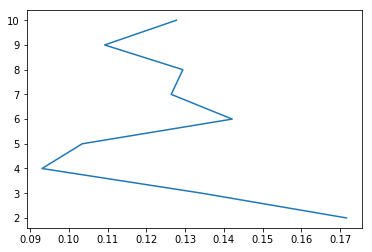

In [47]:
print("分數 :", scores)
print("K值 :", ks)
plt.plot(scores, ks)

In [48]:
from sklearn.cluster import KMeans
clu=(KMeans(n_clusters= 6))
clu.fit(infered_vectors_list)
clu.labels_

array([1, 1, 1, 2, 1, 1, 0, 1, 1, 3, 0, 2, 3, 3, 1, 3, 3, 0, 2, 4, 5, 3,
       0, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 5, 1, 3, 3, 3, 1, 3, 4, 0, 0, 1, 1, 1, 2, 3, 0, 1, 1,
       3, 0, 0, 5, 1, 0, 3, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 0, 0, 3, 2, 3,
       2, 2, 0, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 3, 2,
       0, 5, 5, 1, 3, 1, 3, 1, 3, 0, 3, 3, 1, 2, 2, 1, 1, 1, 2, 0, 3, 3,
       3, 1, 3, 0, 0, 3, 2, 3, 3, 1, 3, 3, 1, 2, 1, 5, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 1,
       0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 5, 0, 1, 1,
       0, 1, 1, 1, 1, 3, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5,
       1, 1, 2, 3, 1, 1, 1, 5, 4, 3, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 4, 2, 2, 1, 2, 2, 0, 3, 1, 0, 1, 3, 3, 1, 2, 3,
       2, 3, 2, 2, 3, 3, 3, 1, 1, 1, 2, 3, 1, 0, 3, 2, 0, 1, 5, 1, 1, 1,
       1, 3, 3, 0, 1, 2, 2, 2, 0, 3, 1, 3, 1, 1])

In [49]:
df['group']='0'
# df
for idx in range(0,300):
    df.loc[idx, 'group'] = clu.labels_[idx]


In [50]:
df.head()

,content,title,d2v_Vec,group
0,前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...,馬英九出席國會青年體驗營（1）,"[0.23528457, -1.2880014, -0.53503346, -1.02029...",1
1,國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...,丁守中與吳伯雄同台（2）,"[-0.056727484, -0.8294517, -0.5735456, -1.0049...",1
2,國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...,丁守中與吳伯雄同台（1）,"[-0.017541343, -0.6924254, -0.45178822, -0.795...",1
3,（ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...,墓仔埔變公園 總統肯定洪國浩施政,"[1.2334144, -0.10023116, -3.6274984, -1.173198...",2
4,（ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...,陳菊：為陳其邁輔選是應該也是責任,"[-1.1006318, 0.49320358, -0.094546005, 0.11488...",1


In [51]:
### 取第0個值_行，在第0個欄位('content')_欄
print(df.iloc[[110,192,195,57,6],[0,3]])

                                               content group
110  【 記者 簡玲穎 台北 報導 】 日本 產經 新聞 報導 專訪 外交部 長 吳釗燮 的 內容...     0
192  （ 中央社 華盛頓 29 日 綜合 外電 報導 ） 兩名 美國 官員 告訴 美國 有線 電視...     0
195  （ 中央社 華盛頓 29 日 綜合 外電 報導 ） 兩名 美國 官員 告訴 美國 有線 電視...     0
57   兩名 美國 官員 告訴 美國 有線 電視 新聞網 （ Ｃ Ｎ Ｎ ） ， 美國 國務院 已 ...     0
6    （ 中央社 記者 游凱翔 台北 30 日電 ） CNN 報導 ， 美國 國務院 已 要求 派...     0


In [53]:
df[df['group'] == 5]

,content,title,d2v_Vec,group
20,立法院 朝野 黨團 今天 協商 公司法 部分 條文 修正 草案 ， 達成 下午 召開 院會 ...,朝野達共識 立院處理公司法,"[-0.5548088, 1.7096705, -0.22628382, 1.0024828...",5
48,〔 中央社 台北 訊 〕 太平洋 流通 投資 股份 有限公司 昨天 表示 ， 媒體 報導 誣...,太流否認有向政府高層溝通公司法,"[-0.28124636, -0.33023456, -0.31256658, 0.2775...",5
69,立法院 院會 二十九日 二讀 公司法 部分 條文 修正 草案 無爭議 條文 ， 未 採納 限...,公司法爭議條文 7/6再處理,"[-1.4916985, 2.7681901, -0.04731376, 0.6450438...",5
111,【 記者 蕭文彥 台北 報導 】 立法院 日前 初審 公司法 ， 經濟部 參考 立委 提案 ...,「不對就不對」 蘇嘉全不護短,"[-0.7390547, -0.69239753, 0.0141962, 0.0882007...",5
112,【 記者 陳 金 寶 台北 報導 】 立法院 臨時 會委員會 即將 在 下 週開會 ， 將處...,擺爛 國家百億預算待立委解凍,"[0.7171309, -3.3870268, -2.015518, -1.1692299,...",5
147,立法院 臨時 會針 對 公司法 修正 草案 展開 協商 ， 爭議 多年 的 Ｓ Ｏ Ｇ Ｏ ...,公司法協商 藍綠砲口一致 SOGO條款刪但書,"[-0.59349024, 0.572629, -0.39206576, 0.8985436...",5
194,（ 中央社 記者 陳 俊華 台北 29 日電 ） 立法院 院會 今天 二讀 公司法 部分 條...,公司法修法 柯建銘：7/6一定處理完成,"[-0.57256144, 0.5580781, -1.3008696, 0.5175052...",5
204,（ 中央社 記者 王承中 、 陳俊華 台北 29 日電 ） 立法院 院會 今天 二讀 公司法...,公司法無爭議條文二讀 未增訂治理人員條文,"[-1.3348414, 2.7703373, 0.07912255, 0.97220635...",5
206,（ 中央社 記者 陳 俊華 台北 29 日電 ） 立法院 臨時會 院會 今天 進行 公司法 ...,公司法廣泛討論 綠：經濟的轉型正義,"[0.8969883, 1.1474276, -0.17198852, 1.636375, ...",5
219,（ 中央社 記者 王承中 、 蘇龍 麒 台北 29 日電 ） 立法院 朝野 黨團 今天 協商...,朝野達成共識 立院開始處理公司法,"[-1.2905177, 2.7588987, -0.1998129, 1.0772098,...",5
